In [2]:
# import dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from pandas.tools.plotting import scatter_matrix
reg = linear_model.LinearRegression()


In [3]:
# load in current WC schedule 
file_path = '../Desktop/WorldCup/wc2018data.csv'
wc_data = pd.read_csv(file_path)
wc_data.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [4]:
# load in fifa_ranking.csv and clean
file_path = '../Desktop/WorldCup/fifa_ranking.csv'
fifa_ranking = pd.read_csv(file_path)

fifa_ranking = fifa_ranking.loc[:,['rank','country_full','country_abrv','cur_year_avg_weighted','rank_date','two_year_ago_weighted','three_year_ago_weighted']]
fifa_ranking = fifa_ranking.replace({'IR Iran': 'Iran'})
fifa_ranking['weighted_points'] = fifa_ranking['cur_year_avg_weighted'] + fifa_ranking['two_year_ago_weighted'] + fifa_ranking['three_year_ago_weighted']
fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking['rank_date'])
fifa_ranking

,rank,country_full,country_abrv,cur_year_avg_weighted,rank_date,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,1,Germany,GER,0.00,1993-08-08,0.00,0.00,0.00
1,2,Italy,ITA,0.00,1993-08-08,0.00,0.00,0.00
2,3,Switzerland,SUI,0.00,1993-08-08,0.00,0.00,0.00
3,4,Sweden,SWE,0.00,1993-08-08,0.00,0.00,0.00
4,5,Argentina,ARG,0.00,1993-08-08,0.00,0.00,0.00
5,6,Republic of Ireland,IRL,0.00,1993-08-08,0.00,0.00,0.00
6,7,Russia,RUS,0.00,1993-08-08,0.00,0.00,0.00
7,8,Brazil,BRA,0.00,1993-08-08,0.00,0.00,0.00
8,9,Norway,NOR,0.00,1993-08-08,0.00,0.00,0.00
9,10,Denmark,DEN,0.00,1993-08-08,0.00,0.00,0.00


In [4]:
# load in results.csv and clean 
file_path = '../Desktop/WorldCup/results.csv'
results = pd.read_csv(file_path)
results = results.replace({'Germany DR':'Germany','China':'China PR'})
results['date'] = pd.to_datetime(results['date'])
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
wc_data.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [6]:
print(wc_data.keys())

Index(['Team', 'Group', 'Previous \nappearances', 'Previous \ntitles',
       'Previous\n finals', 'Previous\n semifinals', 'Current \nFIFA rank',
       'First match \nagainst', 'Match index',
       'history with \nfirst opponent\n W-L',
       'history with\n first opponent\n goals', 'Second match\n against',
       'Match index.1', 'history with\n second opponent\n W-L',
       'history with\n second opponent\n goals', 'Third match\n against',
       'Match index.2', 'history with\n third opponent\n W-L',
       'history with\n third opponent\n goals', 'Unnamed: 19'],
      dtype='object')


In [7]:
# Determine the shape of df
wc_data.shape

(33, 20)

In [8]:
# Clean data 
wc_data = wc_data.loc[:,['Team','Group','First match \nagainst','Second match\n against', 'Third match\n against']]
wc_data = wc_data.dropna(how = 'all')
wc_data = wc_data.replace({
                        'Porugal':'Portugal',
                         'IRAN':'Iran',
                         'Costarica':'Costa Rica',
                         'Korea':'Korea Republic',
                         'Columbia':'Colombia'
                          })
wc_data = wc_data.set_index('Team')
wc_data.head()

,Group,First match against,Second match against,Third match against
Team,,,,
Russia,A,Saudi Arabia,Egypt,Uruguay
Saudi Arabia,A,Russia,Uruguay,Egypt
Egypt,A,Uruguay,Russia,Saudi Arabia
Uruguay,A,Egypt,Saudi Arabia,Russia
Portugal,B,Spain,Morocco,Iran


In [9]:
# Pre prep df to and transform 
fifa_ranking = fifa_ranking.set_index(['rank_date']).groupby(['country_full'], group_keys=False)
#.resample('D').first().fillna(method='ffill').reset_index()

In [10]:
fifa_ranking = fifa_ranking.resample('D').first()

In [11]:
fifa_ranking= fifa_ranking.fillna(method = 'ffill')

In [12]:
fifa_ranking = fifa_ranking.reset_index()

In [13]:
fifa_ranking.head()

,rank_date,rank,country_full,country_abrv,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,2003-01-15,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0
1,2003-01-16,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0
2,2003-01-17,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0
3,2003-01-18,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0
4,2003-01-19,204.0,Afghanistan,AFG,0.0,0.0,0.0,0.0


In [14]:
# Merge with df to get ranking of teams
matches_1 = results.merge(fifa_ranking, left_on =['date','home_team'], right_on = ['rank_date','country_full'])
matches_1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date,rank,country_full,country_abrv,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,59.0,Bolivia,BOL,0.0,0.0,0.0,0.0
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,8.0,Brazil,BRA,0.0,0.0,0.0,0.0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,35.0,Ecuador,ECU,0.0,0.0,0.0,0.0
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,65.0,Guinea,GUI,0.0,0.0,0.0,0.0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,67.0,Paraguay,PAR,0.0,0.0,0.0,0.0


In [15]:
# Merge to get away teams 
df = matches_1.merge(fifa_ranking, left_on = ['date','away_team'], right_on = ['rank_date','country_full'], suffixes = ('_home','_away'))

df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'cur_year_avg_weighted_home', 'two_year_ago_weighted_home',
       'three_year_ago_weighted_home', 'weighted_points_home',
       'rank_date_away', 'rank_away', 'country_full_away', 'country_abrv_away',
       'cur_year_avg_weighted_away', 'two_year_ago_weighted_away',
       'three_year_ago_weighted_away', 'weighted_points_away'],
      dtype='object')

In [159]:
# Create new columns of desired variables: will use these for testing

df['rank_difference'] = df['rank_home'] - df['rank_away']
df['average_rank'] = (df['rank_home'] + df['rank_away']) / 2
df['point_difference'] = df['weighted_points_home'] - df['weighted_points_away']
df['score_difference'] = df['home_score'] - df['away_score']
df['is_won'] = df['score_difference'] > 0
df['avg_weight'] = (df['cur_year_avg_weighted_home'] - df['cur_year_avg_weighted_away'])
df['is_stake'] = df['tournament'] != 'Friendly’


df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,weighted_points_away,rank_difference,average_rank,point_difference,score_differnece,score_difference,is_won,is_stake,avg_weight,num_win
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993-08-08,...,0.00,37.0,40.5,0.00,2,2,True,True,0.00,8938
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993-08-08,...,0.00,-6.0,11.0,0.00,0,0,False,False,0.00,8938
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993-08-08,...,0.00,-59.0,64.5,0.00,5,5,True,True,0.00,8938
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993-08-08,...,0.00,-21.0,75.5,0.00,1,1,True,False,0.00,8938
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993-08-08,...,0.00,62.0,36.0,0.00,-2,-2,False,True,0.00,8938
5,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,1993-08-08,...,0.00,51.0,44.5,0.00,-1,-1,False,True,0.00,8938
6,1993-08-08,Zimbabwe,Swaziland,2,0,Friendly,Harare,Zimbabwe,False,1993-08-08,...,0.00,-52.0,76.0,0.00,2,2,True,False,0.00,8938
7,1993-08-09,Guinea,Sierra Leone,4,0,Friendly,Conakry,Guinea,False,1993-08-09,...,0.00,-21.0,75.5,0.00,4,4,True,False,0.00,8938
8,1993-08-11,Faroe Islands,Norway,0,7,Friendly,Toftir,Faroe Islands,False,1993-08-11,...,0.00,102.0,60.0,0.00,-7,-7,False,False,0.00,8938
9,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,1993-08-11,...,0.00,1.0,3.5,0.00,-1,-1,False,False,0.00,8938


In [105]:
# Sample data to get a brief understaning of var
df.describe()

,home_score,away_score,rank_home,cur_year_avg_weighted_home,two_year_ago_weighted_home,three_year_ago_weighted_home,weighted_points_home,rank_away,cur_year_avg_weighted_away,two_year_ago_weighted_away,three_year_ago_weighted_away,weighted_points_away,rank_difference,average_rank,point_difference,score_differnece,score_difference,avg_weight
count,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000,18460.000000
mean,1.603250,1.061972,75.671993,76.503645,21.994610,15.131451,113.629705,78.087703,74.372943,21.277406,14.416358,110.066706,-2.415710,76.879848,3.562999,0.541278,0.541278,2.130702
std,1.620308,1.247764,50.808202,156.716182,46.347217,31.692349,226.256945,51.696780,153.150350,45.549873,30.461261,221.027478,52.476075,44.029315,147.350266,2.197018,2.197018,110.773397
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-202.000000,1.500000,-1298.660000,-21.000000,-21.000000,-1056.290000
25%,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,-35.000000,41.500000,0.000000,-1.000000,-1.000000,0.000000
50%,1.000000,1.000000,70.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,72.500000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,111.000000,76.500000,17.850000,12.900000,127.150000,114.000000,69.080000,15.590000,11.720000,117.225000,29.000000,106.500000,0.000000,2.000000,2.000000,0.000000
max,31.000000,21.000000,209.000000,1153.120000,347.600000,231.730000,1495.360000,209.000000,1158.660000,347.910000,231.730000,1511.500000,203.000000,204.000000,1293.560000,31.000000,31.000000,857.800000


In [106]:
# Determine the column names
print(df.keys())

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'cur_year_avg_weighted_home', 'two_year_ago_weighted_home',
       'three_year_ago_weighted_home', 'weighted_points_home',
       'rank_date_away', 'rank_away', 'country_full_away', 'country_abrv_away',
       'cur_year_avg_weighted_away', 'two_year_ago_weighted_away',
       'three_year_ago_weighted_away', 'weighted_points_away',
       'rank_difference', 'average_rank', 'point_difference',
       'score_differnece', 'score_difference', 'is_won', 'is_stake',
       'avg_weight'],
      dtype='object')


Model to Run for Test 

1. Linear Model
2.

In [23]:
from sklearn import linear_model
# parse the df to only contain independent variables
df_2_ind = df[['rank_difference','average_rank','point_difference','score_difference','rank_home']]

# isolate the target variable
target = df[['home_score']]

lm = linear_model.LinearRegression()
model_lm = lm.fit(df_2_ind,target)

# lm.predict predict the dependent variable using the linear model we fitted.
predictions = lm.predict(df_2_ind)
try:
    print(predictions)[0:5]
except TypeError:
    pass

[[2.42845005]
 [1.14768202]
 [4.30296327]
 ...
 [0.57217105]
 [1.36629721]
 [3.14696352]]


In [24]:
#lm.score gives the R^2 of the model
print("R^2 of home model: ",lm.score(df_2_ind,target))
print("Coeffcient of home model: ", lm.coef_)
print("Intercept of home model: ", lm.intercept_)

R^2 of home model:  0.6885031961023887
Coeffcient of home model:  [[-3.76246567e-04  1.04292174e-03 -1.44894773e-04  6.11292862e-01
   8.54798457e-04]]
Intercept of home model:  [1.12711401]


In [25]:
# Run the same routine but for away score
df_3_ind = df[['rank_difference','average_rank','point_difference','score_difference','rank_away']]
target_away = df[['away_score']]

lm_away = linear_model.LinearRegression()
model_lm_away = lm_away.fit(df_3_ind, target_away)


predictions_away = lm_away.predict(df_3_ind)
try:
    print(predictions_away)[0:5]
except TypeError:
    pass

[[ 0.42845005]
 [ 1.14768202]
 [-0.69703673]
 ...
 [ 1.57217105]
 [ 1.36629721]
 [ 0.14696352]]


In [26]:
# Determine same variables for away model
print("R^2 of the away model: ", lm_away.score(df_3_ind,target_away))
print("Away Coeffcient: ",lm_away.coef_)
print("Away Intercept: ",lm_away.intercept_)

R^2 of the away model:  0.4747288626709575
Away Coeffcient:  [[ 4.67184631e-04  1.06565626e-03 -1.44894773e-04 -3.88707138e-01
   8.32063941e-04]]
Away Intercept:  [1.12711401]


In [107]:
X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake','avg_weight']], df['is_won']

print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshapaing: {}".format(X.shape))

y = y.reshape(-1,4)
X = X.values.reshape(-1,4)

print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshapaing: {}".format(X.shape))

Dimensions of y before reshaping: (18460,)
Dimensions of X before reshapaing: (18460, 5)
Dimensions of y after reshaping: (4615, 4)
Dimensions of X after reshapaing: (23075, 4)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


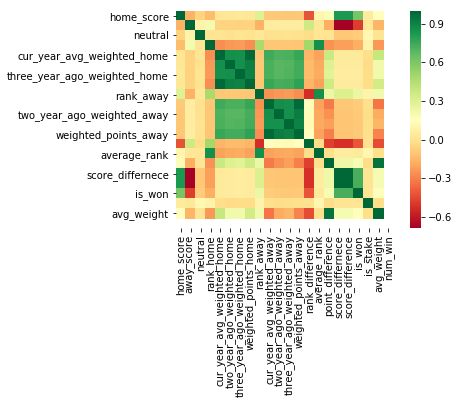

In [165]:
ax = sns.heatmap(df.corr(), square = True, cmap ='RdYlGn')
fig = ax.get_figure()
fig.savefig('HeatMap.png')

In [50]:
r = df['point_difference']

t = df['home_score'] 

prediction_space = np.linspace(min(r),max(r).reshape(1,-1))

reg.fit(r,t)

y_pred = reg.predict(prediction_space)

print(reg.score(r,t))

plt.plot(prediction_space,y_pred,color = 'black',linewidth =3)
plt.show()

AttributeError: 'float' object has no attribute 'reshape'

In [109]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X,y = df.loc[:,['average_rank','rank_difference','avg_weight']], df['point_difference']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9154184661398009
Root Mean Squared Error: 42.40478853408971


In [166]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.17774830121027307
Root Mean Squared Error: 0.45299245868344784


In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create training and test sets
X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']

# Create a linear regression object
reg = LinearRegression()

# Compute 5-fold cross validation scores:
cv_scores = cross_val_score(reg,X,y,cv = 5)

# Perform a 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv = 3)

# Print a 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv = 10)

print("Average 3-Fold CV Score: {}".format(np.mean(cvscores_3)))
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
print("Average 10-Fold CV Score: {}".format(np.mean(cvscores_10)))

Average 3-Fold CV Score: 0.17165039543170943
Average 5-Fold CV Score: 0.17170279127554944
Average 10-Fold CV Score: 0.17153506249619058


In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create training and test sets
X,y = df.loc[:,['average_rank','rank_difference','avg_weight']], df['point_difference']


# Create a linear regression object
reg = LinearRegression()

# Compute 5-fold cross validation scores:
cv_scores = cross_val_score(reg,X,y,cv = 5)

# Perform a 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv = 3)

# Print a 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv = 10)

print("Average 3-Fold CV Score: {}".format(np.mean(cvscores_3)))
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))
print("Average 10-Fold CV Score: {}".format(np.mean(cvscores_10)))

Average 3-Fold CV Score: -0.0005854434393655072
Average 5-Fold CV Score: 0.363855096420143
Average 10-Fold CV Score: 0.27491891175679484


In [63]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'cur_year_avg_weighted_home', 'two_year_ago_weighted_home',
       'three_year_ago_weighted_home', 'weighted_points_home',
       'rank_date_away', 'rank_away', 'country_full_away', 'country_abrv_away',
       'cur_year_avg_weighted_away', 'two_year_ago_weighted_away',
       'three_year_ago_weighted_away', 'weighted_points_away',
       'rank_difference', 'average_rank', 'point_difference',
       'score_differnece', 'score_difference', 'is_won', 'is_stake'],
      dtype='object')

[-0.         -0.          0.88956927]
Lasso score:  0.830079301939818


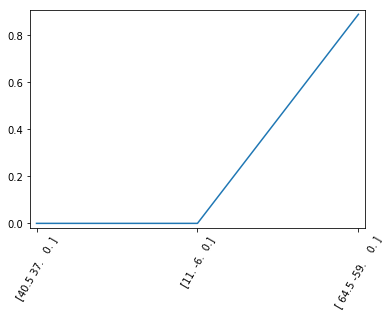

In [112]:
from sklearn.linear_model import Lasso
df_columns = df.columns
X,y = df.loc[:,['average_rank','rank_difference','avg_weight']], df['point_difference']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

lasso = Lasso(alpha = 0.4, normalize = True)

lasso.fit(X_train,y_train)

lasso_pred = lasso.predict(X_test)
lasso_coef = lasso.coef_
print(lasso_coef)



print("Lasso score: ",lasso.score(X_test,y_test))


plt.plot(range(len(X.columns)),lasso_coef)

plt.xticks(range(len(X.columns)),X.values,rotation = 60)
plt.margins(0.02)
plt.show()


In [99]:
range(len(X.columns))

range(0, 4)

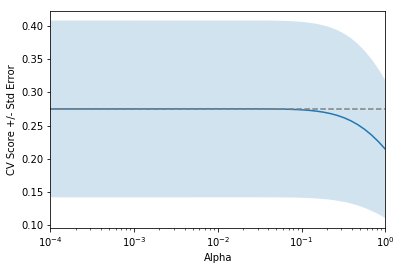

In [113]:
from sklearn.linear_model import Ridge

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4,0,50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:
    #Specify the alpha values to use
    ridge.alpha = alpha
    
    #Perform 10-fold CV
    ridge_cv_scores = cross_val_score(ridge,X,y,cv = 10)
    # Append the mean
    ridge_scores.append(np.mean(ridge_cv_scores))
    # Append the std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores,ridge_scores_std)

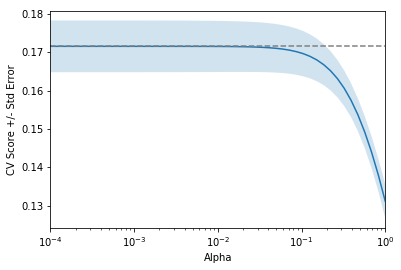

In [170]:
from sklearn.linear_model import Ridge

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4,0,50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor
ridge = Ridge(normalize = True)
X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']
# Compute scores over range of alphas
for alpha in alpha_space:
    #Specify the alpha values to use
    ridge.alpha = alpha
    
    #Perform 10-fold CV
    ridge_cv_scores = cross_val_score(ridge,X,y,cv = 10)
    # Append the mean
    ridge_scores.append(np.mean(ridge_cv_scores))
    # Append the std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores,ridge_scores_std)

In [116]:
# import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2868  941]
 [1705 1870]]
             precision    recall  f1-score   support

      False       0.63      0.75      0.68      3809
       True       0.67      0.52      0.59      3575

avg / total       0.65      0.64      0.64      7384



In [85]:
from sklearn.linear_model import LogisticRegression
# Create training and test sets
X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

# Create the classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logreg.predict(X_test)


# Compute and print the confusion matrix and classification report

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2682 1127]
 [1271 2304]]
             precision    recall  f1-score   support

      False       0.68      0.70      0.69      3809
       True       0.67      0.64      0.66      3575

avg / total       0.68      0.68      0.67      7384



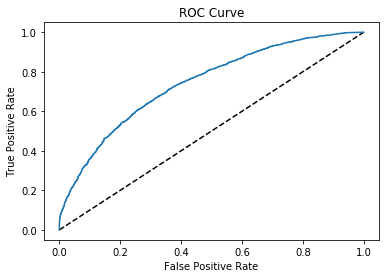

In [87]:
# import 
from sklearn.metrics import roc_curve

# Compute predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test,y_pred_prob)))

# Compute cross-validated AUC scores
cv_auc = cross_val_score(logreg,X,y,cv = 5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.7412463304613475
AUC scores computed using 5-fold cross-validation: [0.73847596 0.7391744  0.76112723 0.72931592 0.73220781]


In [89]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.6758396533044421


In [91]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": [0, n_features],
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


NameError: name 'n_features' is not defined

In [92]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 2275.845926074791, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.6758757674250632


In [133]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X,y = df.loc[:,['average_rank','rank_difference','avg_weight']], df['point_difference']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.9180314348708019
Tuned ElasticNet MSE: 1773.4374826261173


In [136]:
# Create dummy variables 
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy vars with drop_first = True
df_region = pd.get_dummies(df,drop_first = True)

print(df_region.columns)

# Instantiate a ridge regressor
ridge = Ridge(alpha = 0.5, normalize = True)
X,y = df_region.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']
#Perform a 5-fold cross-validation
ridge_cv = cross_val_score(ridge, X,y, cv = 5)

print(ridge_cv)

Index(['date', 'home_score', 'away_score', 'neutral', 'rank_date_home',
       'rank_home', 'cur_year_avg_weighted_home', 'two_year_ago_weighted_home',
       'three_year_ago_weighted_home', 'weighted_points_home',
       ...
       'country_abrv_away_USA', 'country_abrv_away_UZB',
       'country_abrv_away_VAN', 'country_abrv_away_VEN',
       'country_abrv_away_VGB', 'country_abrv_away_VIE',
       'country_abrv_away_WAL', 'country_abrv_away_YEM',
       'country_abrv_away_ZAM', 'country_abrv_away_ZIM'],
      dtype='object', length=2873)
Index(['date', 'home_score', 'away_score', 'neutral', 'rank_date_home',
       'rank_home', 'cur_year_avg_weighted_home', 'two_year_ago_weighted_home',
       'three_year_ago_weighted_home', 'weighted_points_home',
       ...
       'country_abrv_away_USA', 'country_abrv_away_UZB',
       'country_abrv_away_VAN', 'country_abrv_away_VEN',
       'country_abrv_away_VGB', 'country_abrv_away_VIE',
       'country_abrv_away_WAL', 'country_abrv_away_YEM',

In [142]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X,y = df.loc[:,['average_rank','rank_difference','avg_weight']], df['point_difference']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.9178973450924337


In [171]:
# Model Parameters
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Setting indep and dep variables for model
X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']
#X,y = df.loc[:,['average_rank','rank_difference','avg_weight','point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

# load variables in LogReg
logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree = 2)
model = Pipeline([('polynomial_features', features), ('logistic_regression', logreg)])

model = model.fit(X_train, y_train)
# load variables for LinReg
#rgr = RandomForestRegressor()

#model_rgr = rgr.fit(X_train, y_train)

In [172]:
# Setting margins for testing
margin = 0.1

# Matching combined df with current schedule
world_cup_rankings = fifa_ranking.loc[(fifa_ranking['rank_date'] == fifa_ranking['rank_date'].max()) & fifa_ranking['country_full'].isin(wc_data.index.unique())]  

world_cup_rankings = world_cup_rankings.set_index(['country_full'])
world_cup_rankings.head()

,rank_date,rank,country_abrv,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
country_full,,,,,,,
Argentina,2018-06-07,5.0,ARG,404.07,248.99,183.59,836.65
Australia,2018-06-07,36.0,AUS,366.60,98.16,59.79,524.55
Belgium,2018-06-07,3.0,BEL,629.98,158.94,186.58,975.50
Brazil,2018-06-07,2.0,BRA,558.95,168.06,162.38,889.39
Colombia,2018-06-07,16.0,COL,292.09,199.73,166.38,658.20


In [173]:
from itertools import combinations


teams = ['First match \nagainst','Second match\n against', 'Third match\n agianst']

wc_data['points'] = 0
wc_data['total_probability'] = 0


for group in set(wc_data['Group']):
    print('___Starting Group {}:___'.format(group))
    for home, away in combinations(wc_data.query('Group == "{}"'.format(group)).index,2):
        print("{} vs {}: ".format(home,away), end = '')
        row = pd.DataFrame(np.array([[np.nan,np.nan,np.nan,True]]), columns = X_test.columns)
        
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opponent_rank = world_cup_rankings.loc[away, 'rank']
        opponent_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opponent_rank) / 2
        row['rank_difference'] = home_rank - opponent_rank
        row['point_difference'] = home_points - opponent_points
        
        home_win_probability = model.predict_proba(row)[:,1][0]
        wc_data.loc[home, 'total_probability'] += home_win_probability
        wc_data.loc[away, 'total_probability'] += 1 - home_win_probability
        
        points = 0
        if home_win_probability <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1 - home_win_probability))
            wc_data.loc[away, 'points'] += 3
        if home_win_probability > 0.5 - margin:
            points = 1
        if home_win_probability >= 0.5 + margin:
            points = 3
            wc_data.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_probability))
        if points ==1:
            print('Draw')
            wc_data.loc[home,'points'] += 1
            wc_data.loc[away, 'points'] += 1

___Starting Group G:___
Belgium vs Panama: Belgium wins with 0.73
Belgium vs Tunisia: Belgium wins with 0.61
Belgium vs England: Draw
Panama vs Tunisia: Tunisia wins with 0.71
Panama vs England: England wins with 0.76
Tunisia vs England: Draw
___Starting Group D:___
Argentina vs Iceland: Draw
Argentina vs Croatia: Draw
Argentina vs Nigeria: Argentina wins with 0.70
Iceland vs Croatia: Draw
Iceland vs Nigeria: Iceland wins with 0.61
Croatia vs Nigeria: Croatia wins with 0.62
___Starting Group E:___
Brazil vs Switzerland: Draw
Brazil vs Costa Rica: Brazil wins with 0.62
Brazil vs Serbia: Brazil wins with 0.67
Switzerland vs Costa Rica: Draw
Switzerland vs Serbia: Switzerland wins with 0.64
Costa Rica vs Serbia: Draw
___Starting Group B:___
Portugal vs Spain: Draw
Portugal vs Morocco: Portugal wins with 0.68
Portugal vs Iran: Portugal wins with 0.67
Spain vs Morocco: Spain wins with 0.65
Spain vs Iran: Spain wins with 0.64
Morocco vs Iran: Draw
___Starting Group C:___
France vs Australia:

In [174]:
next_round = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

wc = wc_data.sort_values(by = ['Group', 'points', 'total_probability'], ascending = False).reset_index()


round_of_16 = wc.groupby('Group').nth([0,1])

round_of_16 = round_of_16.reset_index()
round_of_16 = round_of_16.loc[next_round]
round_of_16 = round_of_16.set_index('Team')

finals = ['Round_0f_16', 'Quarterfinal', 'SemiFinal', 'Final']

labels = list()
odds = list()

for i in finals:
    print("___Starting of the {}___".format(i))
    iterations = int(len(round_of_16) / 2)
    winners = []
    
    for j in range(iterations):
        home = round_of_16.index[j*2]
        away = round_of_16.index[j*2+1]
        print("{} vs. {}: ".format(home,away), end = '')
        
        row = pd.DataFrame(np.array([[np.nan, np.nan,np.nan, True]]), columns = X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opponent_rank = world_cup_rankings.loc[away, 'rank']
        opponent_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opponent_rank) / 2
        row['rank_difference'] = home_rank - opponent_rank
        row['point_difference'] = home_points - opponent_points
        
        home_win_probability = model.predict_proba(row)[:,1][0]
        if model.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1 - home_win_probability))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_probability))
            winners.append(home)
            labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 1/home_win_probability, world_cup_rankings.loc[away, 'country_abrv'],1/(1-home_win_probability))) 
            odds.append([home_win_probability, 1-home_win_probability])
    
    round_of_16 = round_of_16.loc[winners]
    print("\n")

___Starting of the Round_0f_16___
Uruguay vs. Spain: Spain wins with probability 0.54
Denmark vs. Croatia: Denmark wins with probability 0.56
Brazil vs. Mexico: Brazil wins with probability 0.58
Belgium vs. Colombia: Belgium wins with probability 0.60
Egypt vs. Portugal: Portugal wins with probability 0.78
France vs. Argentina: Argentina wins with probability 0.53
Switzerland vs. Germany: Germany wins with probability 0.58
England vs. Poland: Poland wins with probability 0.53


___Starting of the Quarterfinal___
Spain vs. Denmark: Denmark wins with probability 0.51
Brazil vs. Belgium: Belgium wins with probability 0.51
Portugal vs. Argentina: Portugal wins with probability 0.52
Germany vs. Poland: Germany wins with probability 0.59


___Starting of the SemiFinal___
Denmark vs. Belgium: Belgium wins with probability 0.57
Portugal vs. Germany: Germany wins with probability 0.55


___Starting of the Final___
Belgium vs. Germany: Germany wins with probability 0.54




In [175]:
# Model Parameters
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Setting indep and dep variables for model
X,y = df.loc[:,['average_rank','rank_difference','point_difference','is_stake']], df['is_won']
#X,y = df.loc[:,['average_rank','rank_difference','avg_weight','point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

# load variables in LogReg
#logreg = linear_model.LogisticRegression(C=1e-5)
#features = PolynomialFeatures(degree = 2)
#model = Pipeline([('polynomial_features', features), ('logistic_regression', logreg)])

#model = model.fit(X_train, y_train)

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)

# Instantiate the GridSearchCV object: logreg_cv
model = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [177]:
# Setting margins for testing
margin = 0.1

# Matching combined df with current schedule
world_cup_rankings = fifa_ranking.loc[(fifa_ranking['rank_date'] == fifa_ranking['rank_date'].max()) & fifa_ranking['country_full'].isin(wc_data.index.unique())]  

world_cup_rankings = world_cup_rankings.set_index(['country_full'])
world_cup_rankings.head()

,rank_date,rank,country_abrv,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,weighted_points
country_full,,,,,,,
Argentina,2018-06-07,5.0,ARG,404.07,248.99,183.59,836.65
Australia,2018-06-07,36.0,AUS,366.60,98.16,59.79,524.55
Belgium,2018-06-07,3.0,BEL,629.98,158.94,186.58,975.50
Brazil,2018-06-07,2.0,BRA,558.95,168.06,162.38,889.39
Colombia,2018-06-07,16.0,COL,292.09,199.73,166.38,658.20


In [179]:
from itertools import combinations


teams = ['First match \nagainst','Second match\n against', 'Third match\n agianst']

wc_data['points'] = 0
wc_data['total_probability'] = 0


for group in set(wc_data['Group']):
    print('___Starting Group {}:___'.format(group))
    for home, away in combinations(wc_data.query('Group == "{}"'.format(group)).index,2):
        print("{} vs {}: ".format(home,away), end = '')
        row = pd.DataFrame(np.array([[np.nan,np.nan,np.nan,True]]), columns = X_test.columns)
        
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opponent_rank = world_cup_rankings.loc[away, 'rank']
        opponent_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opponent_rank) / 2
        row['rank_difference'] = home_rank - opponent_rank
        row['point_difference'] = home_points - opponent_points
        
        home_win_probability = model.predict_proba(row)[:,1][0]
        wc_data.loc[home, 'total_probability'] += home_win_probability
        wc_data.loc[away, 'total_probability'] += 1 - home_win_probability
        
        points = 0
        if home_win_probability <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1 - home_win_probability))
            wc_data.loc[away, 'points'] += 3
        if home_win_probability > 0.5 - margin:
            points = 1
        if home_win_probability >= 0.5 + margin:
            points = 3
            wc_data.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_probability))
        if points ==1:
            print('Draw')
            wc_data.loc[home,'points'] += 1
            wc_data.loc[away, 'points'] += 1

___Starting Group G:___
Belgium vs Panama: Belgium wins with 0.71
Belgium vs Tunisia: Draw
Belgium vs England: Draw
Panama vs Tunisia: Tunisia wins with 0.70
Panama vs England: England wins with 0.73
Tunisia vs England: Draw
___Starting Group D:___
Argentina vs Iceland: Draw
Argentina vs Croatia: Draw
Argentina vs Nigeria: Argentina wins with 0.67
Iceland vs Croatia: Draw
Iceland vs Nigeria: Draw
Croatia vs Nigeria: Croatia wins with 0.60
___Starting Group E:___
Brazil vs Switzerland: Draw
Brazil vs Costa Rica: Draw
Brazil vs Serbia: Brazil wins with 0.62
Switzerland vs Costa Rica: Draw
Switzerland vs Serbia: Draw
Costa Rica vs Serbia: Draw
___Starting Group B:___
Portugal vs Spain: Draw
Portugal vs Morocco: Portugal wins with 0.65
Portugal vs Iran: Portugal wins with 0.63
Spain vs Morocco: Spain wins with 0.62
Spain vs Iran: Draw
Morocco vs Iran: Draw
___Starting Group C:___
France vs Australia: France wins with 0.60
France vs Peru: Draw
France vs Denmark: Draw
Australia vs Peru: Peru

In [180]:
next_round = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

wc = wc_data.sort_values(by = ['Group', 'points', 'total_probability'], ascending = False).reset_index()


round_of_16 = wc.groupby('Group').nth([0,1])

round_of_16 = round_of_16.reset_index()
round_of_16 = round_of_16.loc[next_round]
round_of_16 = round_of_16.set_index('Team')

finals = ['Round_0f_16', 'Quarterfinal', 'SemiFinal', 'Final']

labels = list()
odds = list()

for i in finals:
    print("___Starting of the {}___".format(i))
    iterations = int(len(round_of_16) / 2)
    winners = []
    
    for j in range(iterations):
        home = round_of_16.index[j*2]
        away = round_of_16.index[j*2+1]
        print("{} vs. {}: ".format(home,away), end = '')
        
        row = pd.DataFrame(np.array([[np.nan, np.nan,np.nan, True]]), columns = X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opponent_rank = world_cup_rankings.loc[away, 'rank']
        opponent_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opponent_rank) / 2
        row['rank_difference'] = home_rank - opponent_rank
        row['point_difference'] = home_points - opponent_points
        
        home_win_probability = model.predict_proba(row)[:,1][0]
        if model.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1 - home_win_probability))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_probability))
            winners.append(home)
            labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 1/home_win_probability, world_cup_rankings.loc[away, 'country_abrv'],1/(1-home_win_probability))) 
            odds.append([home_win_probability, 1-home_win_probability])
    
    round_of_16 = round_of_16.loc[winners]
    print("\n")

___Starting of the Round_0f_16___
Uruguay vs. Spain: Spain wins with probability 0.56
Denmark vs. Croatia: Denmark wins with probability 0.50
Brazil vs. Mexico: Brazil wins with probability 0.52
England vs. Poland: Poland wins with probability 0.56
Egypt vs. Portugal: Portugal wins with probability 0.73
Peru vs. Argentina: Argentina wins with probability 0.58
Switzerland vs. Germany: Germany wins with probability 0.58
Belgium vs. Colombia: Belgium wins with probability 0.53


___Starting of the Quarterfinal___
Spain vs. Denmark: Denmark wins with probability 0.54
Brazil vs. Poland: Poland wins with probability 0.51
Portugal vs. Argentina: Argentina wins with probability 0.54
Germany vs. Belgium: Belgium wins with probability 0.53


___Starting of the SemiFinal___
Denmark vs. Poland: Poland wins with probability 0.56
Argentina vs. Belgium: Belgium wins with probability 0.56


___Starting of the Final___
Poland vs. Belgium: Belgium wins with probability 0.57


